### Gradient Descent Algorithm for Linear Regression (10 points)

The gradient descent algorithm is a powerful optimization technique used to iteratively refine model parameters for a better fit. In the context of linear regression, it aims to find optimal values of the slope $ m $ and intercept $ c $ that minimize the mean squared error between the predicted and actual values.

The steps for each iteration (or epoch) are:

1. **Prediction:**
   Use the current values of $ m $ and $ c $ to calculate the predicted values:
   $$ y_{\text{pred}} = w \cdot x + b $$

2. **Compute Gradients:**
   Determine the gradient of the loss with respect to each parameter:
   - Gradient with respect to the slope $ m $:
$$
D_w = \frac{-2}{n} \sum (x \cdot (y_{\text{noisy}} - y_{\text{pred}}))
$$



   - Gradient with respect to the intercept $ c $:
$$
D_b = \frac{-2}{n} \sum (y_{\text{noisy}} - y_{\text{pred}})
$$

3. **Update Parameters:**
   Adjust $ w $ and $ b $ based on the gradients and the learning rate $ \alpha $:
   $$ w = w - \alpha \cdot D_w $$
   $$ b = b - \alpha \cdot D_b $$


In the code below replace $# Your code here$ with your code


In [224]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import os
import imageio

random.seed(42)
np.random.seed(42)

x = np.linspace(0, 10, 100)

# Noisy Linear Data generation
y_linear_noisy = 3*x + 2 + np.random.randn(100)*5

# Initial values for m (slope) and c (intercept)
w, b = 0, 0  # Model parameters
learning_rate = 0.01# learning rate
epochs = 15  # Limit to 15 epochs

# Lists to save the plots at each epoch for visualization
lines = []

# print variables to observe
print(f"x: {x}")
print()
print(f"y_linear_noisy: {y_linear_noisy}")

x: [ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.18181818

In [225]:
# Test code for each epoch
y_pred = w * x + b
print(y_pred)

# Calculate gradients
D_w = (-2/len(x)) * sum(x * (y_linear_noisy - y_pred))
D_b = (-2/len(x)) * sum(y_linear_noisy - y_pred)

print(D_w, D_b)

# Update parameters, watch formulas listed above to implement
w = w - learning_rate * D_w
b = b - learning_rate * D_b

print(w, b)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
-216.99043507389993 -32.961534826059044
2.1699043507389995 0.32961534826059047


/var/folders/b8/bxlpngnn4dd74v10s4rp5mp40000gn/T/ipykernel_39157/3280767450.py:31: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


Optimized Parameters: Slope (m) = 3.1605497473212765, Intercept (c) = 0.526842024174439


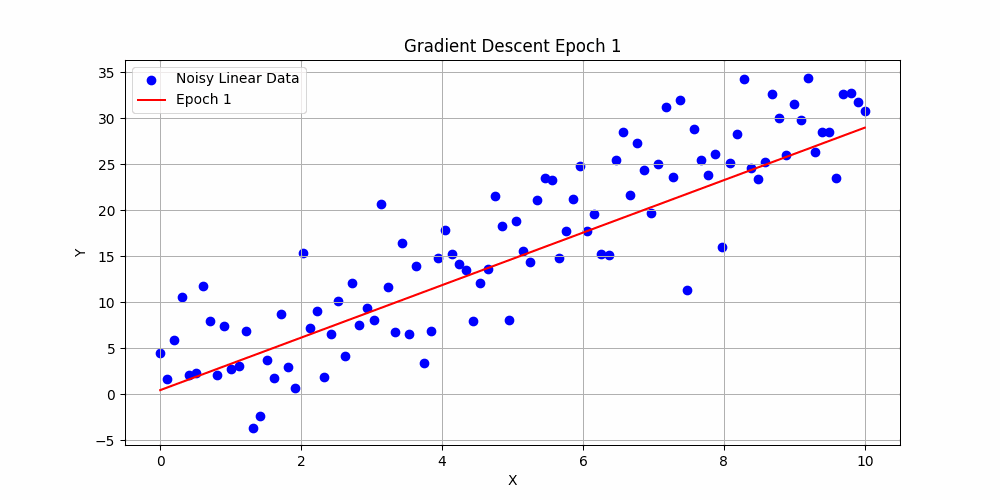

In [226]:

# Gradient Descent
for epoch in range(epochs):
    # Make predictions, watch formula listed above to implement
    y_pred = w * x + b

    # Calculate gradients
    D_w = (-2/len(x)) * sum(x * (y_linear_noisy - y_pred))
    D_b = (-2/len(x)) * sum(y_linear_noisy - y_pred)

    # Update parameters, watch formulas listed above to implement
    w = w - learning_rate * D_w
    b = b - learning_rate * D_b 

    # Visualization
    plt.figure(figsize=(10,5))
    plt.scatter(x, y_linear_noisy, c='blue', label='Noisy Linear Data')
    plt.plot(x, w*x+b, '-r', label=f'Epoch {epoch+1}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Gradient Descent Epoch {epoch+1}')
    plt.legend()
    plt.grid(True)
    filename = f'epoch_{epoch}.png'
    plt.savefig(filename)
    lines.append(filename)
    plt.close()

# Create gif with slowed down duration and infinite loop
with imageio.get_writer('gradient_descent.gif', mode='I', duration=700, loop = 0) as writer:  # duration is in seconds per frame
    for filename in lines:
        image = imageio.imread(filename)
        writer.append_data(image)

# Cleanup the individual frames
for filename in lines:
    os.remove(filename)

# Display the optimized parameters and the gif
print(f"Optimized Parameters: Slope (m) = {w}, Intercept (c) = {b}")

# Display gif in Jupyter notebook
from IPython.display import Image
Image(filename="gradient_descent.gif")  # loop=0 makes it loop indefinitely


### Linear regression using sklearn (10 points)

Load the dataset and perform basic data exploration.

In [227]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

california_housing = fetch_california_housing(as_frame=True)

# Load dataset
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df['MedHouseVal'] = california_housing.target

# Display the first few rows
print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


Split the data into training and testing sets.



In [228]:
from sklearn.model_selection import train_test_split

X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

print(f"x: {type(x)}")
print(f"y: {type(y)}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train: {type(X_train)}")
print(f"Y_train: {type(y_train)}")


x: <class 'numpy.ndarray'>
y: <class 'pandas.core.series.Series'>
X_train: <class 'pandas.core.frame.DataFrame'>
Y_train: <class 'pandas.core.series.Series'>


Fit a linear regression model to the training data and evaluate its performance on the testing set.

In [229]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import random

# set random seed
random.seed(42)
np.random.seed(42)

# Create a model object
reg = SGDRegressor(max_iter=40) #Your code here (define linear regression model with max_iter parameter equal to 40)
model = make_pipeline(StandardScaler(),reg)
# In case of any difficulties check: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor

Mean Squared Error: 0.550598777585777


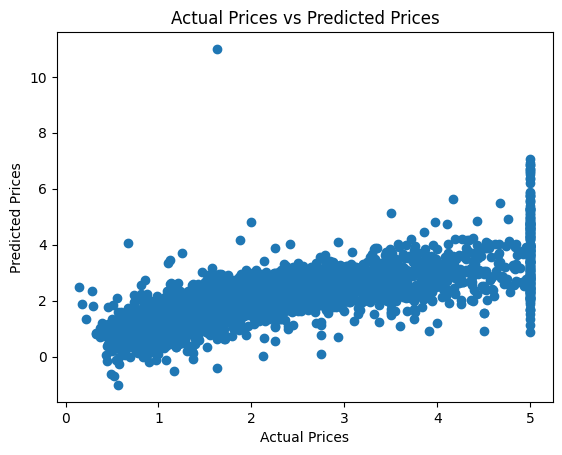

In [230]:
# Fit the model to the training data
# Your code here

model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test) # Your code here

# Calculate and display the mean squared error between the actual and predicted values on test set
mse = mean_squared_error(y_test, y_pred)
# acc = accuracy_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
# print(f"Accuracy: {acc}")


# Plot the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()


Tip: SGDRegressor has fit and predict methods

(10 points)

### Changing hyperparameters

What happens with accuracy if you change  max_iter to 3? Modify and place code from the previous cell in the cell below.


Tip: Examples of how to use max_iter can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html



How can you explain this behavior? (5 points):

Mean Squared Error: 1.2322400452788693


/Users/liuyucheng/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


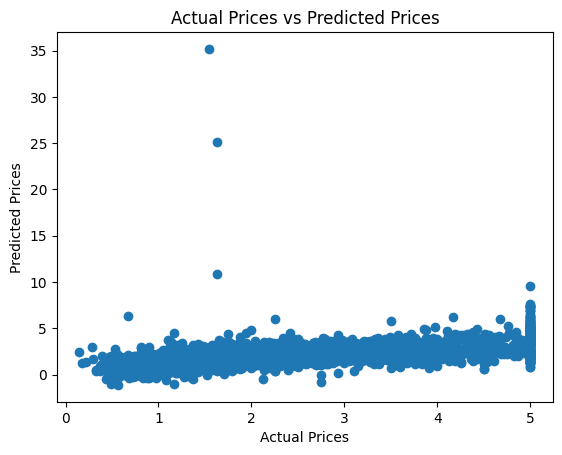

In [231]:
# Place modified code here

# Create a model object
reg = SGDRegressor(max_iter=3) #Your code here (define linear regression model with max_iter parameter equal to 40)
model = make_pipeline(StandardScaler(),reg)
# In case of any difficulties check: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor

# Fit the model to the training data
# Your code here

model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test) # Your code here

# Calculate and display the mean squared error between the actual and predicted values on test set
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


# Plot the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

#### Answer: ####
By changing the max_iter to 3, I find that the slope of the point trend become lower, which means that the accuracy of the model become lower. As far as I am concerned, the model trained with 3 epoch is still in underfitting. Hence, the accuracy is still low in this case.

### Regularization Parameter Search for Ridge Regression (5 points)



Manually search for the best regularization parameter alpha in Ridge regression.

The goal of **Ridge regression** (aka Tikhonov regression) is to find a linear model that not only fits the data well but also has small parameter values. This yields to simpler models and therefore prevents overfitting to the data


The regularization parameter $\alpha$ controls the trade-off: When $\alpha$ = 0, Ridge regression becomes equivalent to linear regression without any regularization.
As $\alpha$ increases, the impact of the regularization term also increases, leading to a stronger preference for smaller parameter values (thus simpler models).
If $\alpha$ is very large, the regularization term dominates, causing the model parameters to tend towards zero, which leads to a model that is more biased.It's important to choose $\alpha$ properly to balance a balance between underfitting and overfitting.




First step is Feature scaling

Feature scaling is a technique used in machine learning and statistics to normalize the range of independent variables or features of the data. This normalization often helps in speeding up the training process and can lead to better performance in certain algorithms that are sensitive to the scale of features.

StandardScaler transforms the data into a distribution with a mean of 0 and a standard deviation of 1.

In [232]:
from sklearn.preprocessing import StandardScaler

# Initialize and fit the scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it to have zero mean and unit variance
X_train_scaled = scaler.fit_transform(X_train)

# Use the scaler fitted on the training data to scale the test data
X_test_scaled = scaler.transform(X_test)


Find optimal value of alpha for Ridge Regression

In [233]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# List of alphas (regularization parameter values) to test
alphas = [1e-5, 1e-3, 1e-2, 100, 500, 1000, 10000]


alpha = alphas[-1] # Your code here, you can chose any value from the list above

ridge = Ridge(alpha=alpha)
ridge.fit(X_train_scaled, y_train)
# In case of any difficulties check: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge

# Predict on the validation data
y_pred = ridge.predict(X_test) # Your code here

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

print(f"Alpha Value: {alpha}")
print(f"Mean Squared Error: {mse}")


Alpha Value: 10000
Mean Squared Error: 113.45896636929982


/Users/liuyucheng/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


In [234]:
y_train

14196    1.030
8267     3.821
17445    1.726
14265    0.934
2271     0.965
         ...  
11284    2.292
11964    0.978
5390     2.221
860      2.835
15795    3.250
Name: MedHouseVal, Length: 16512, dtype: float64

What happens to accuracy when alpha (regularization parameter) is too high or too low?

Your answer here

/Users/liuyucheng/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/Users/liuyucheng/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/Users/liuyucheng/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/Users/liuyucheng/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


/Users/liuyucheng/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/Users/liuyucheng/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/Users/liuyucheng/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


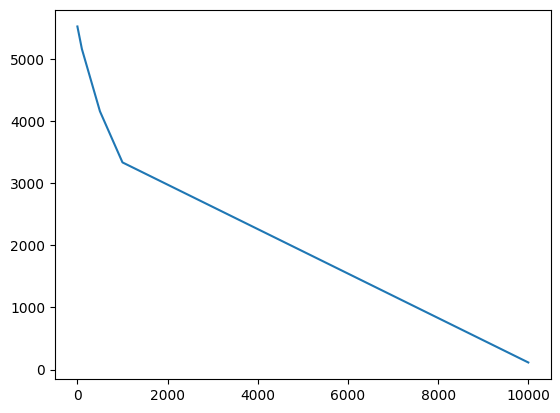

In [235]:
MSEs = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)  
    ridge.fit(X_train_scaled, y_train)

    # Predict on the validation data
    y_pred = ridge.predict(X_test) # Your code here

    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    MSEs.append(mse)
plt.plot(alphas, MSEs)
plt.show()

    

### Answer: ###
 When the Alpha is too high, the model will try it best to minimize the parameters in the linear model. Hence, the parameter in the model may be minimized to zero. The accuracy is lower. On the other hand, when the Alpha is too low, the loss term of regularization will be extremely low, hence, it cannot constrain the parameters in the model.

## Classification with the Iris Dataset Using Logistic Regression (8 points)
Load the dataset and perform basic data exploration.



Split the data into training and testing sets.


Train a Logistic Regression classifier and evaluate its performance.

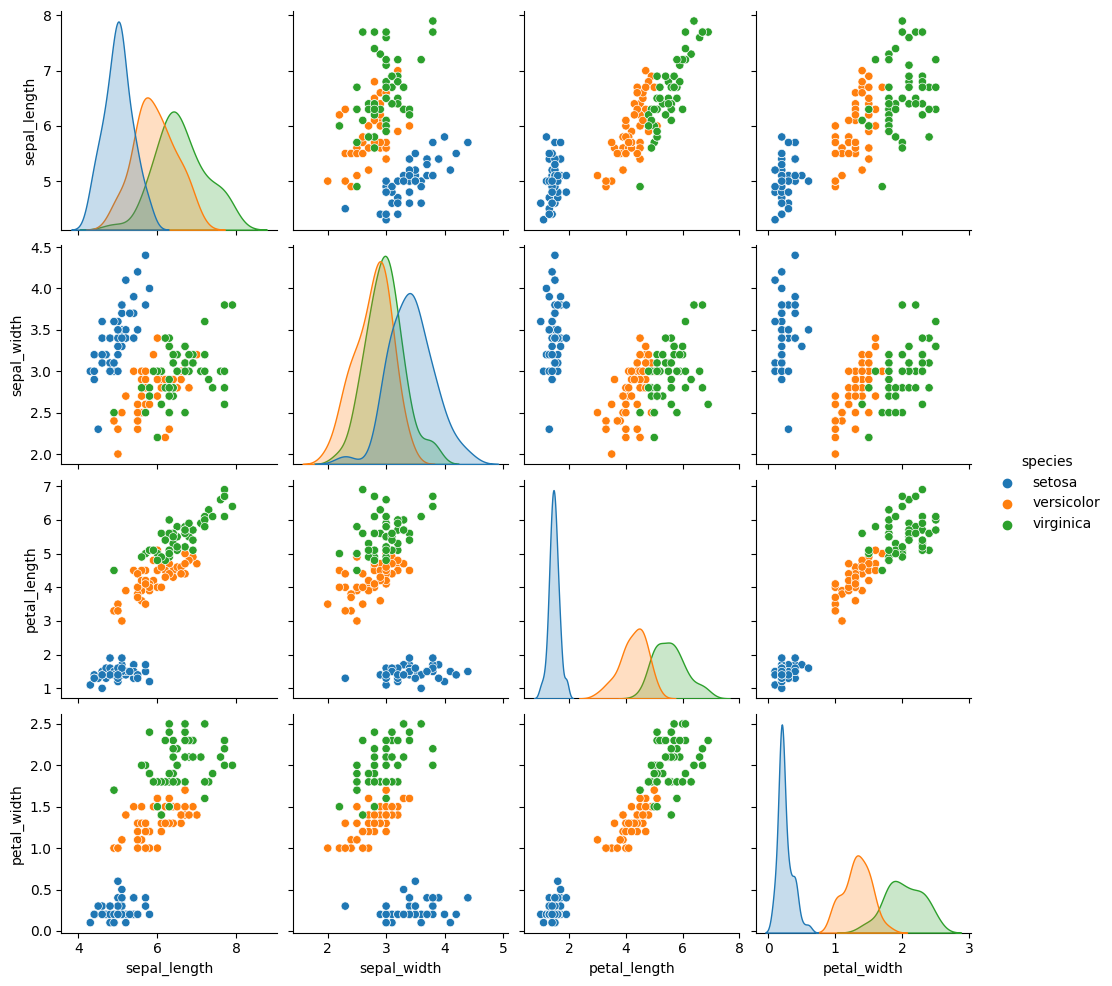

In [236]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
iris = sns.load_dataset("iris")

# Visualize the dataset using a pair plot
sns.pairplot(iris, hue="species")
plt.show()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into features and labels
X = iris.drop("species", axis=1)
y = iris["species"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Accuracy: 1.0000
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



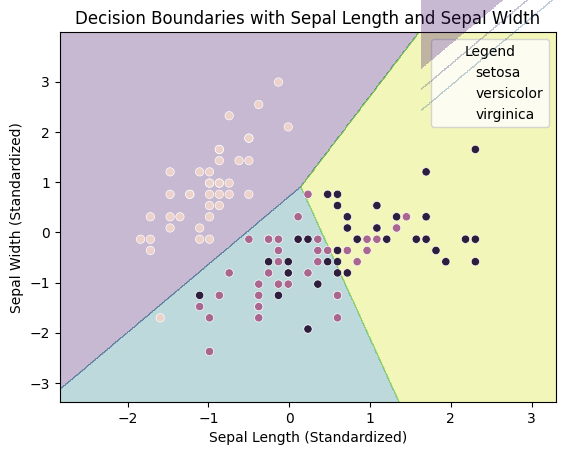

In [237]:

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression

# Create a logistic regression model with OvR multi-class strategy, peek suitable value for max_iter
clf = LogisticRegression(max_iter=100)# Your code here

# In case of any difficulties check: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
# Train the model
# Your code here

clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report

# Predict the species for the test set
y_pred = clf.predict(X_test) # Your code here

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Display a classification report
report = classification_report(y_test, y_pred)
print(report)


import numpy as np

# For simplicity, let's visualize using only the first two features (sepal length and sepal width)
X_train_2d = X_train[:, :2]

# Train the model again on the 2D data
clf.fit(X_train_2d, y_train)

# Plot the decision boundaries
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

from sklearn.preprocessing import LabelEncoder

# Encode labels into numbers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Train the classifier again on the 2D data
clf.fit(X_train_2d, y_train_encoded)

# Predict
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# No need to decode since we're just plotting the boundaries
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
sns.scatterplot(x=X_train_2d[:, 0], y=X_train_2d[:, 1], hue=label_encoder.transform(y_train))
plt.title('Decision Boundaries with Sepal Length and Sepal Width')
plt.xlabel('Sepal Length (Standardized)')
plt.ylabel('Sepal Width (Standardized)', )
plt.legend(title='Legend', loc='best', labels=['setosa', 'versicolor', 'virginica'])
plt.show()

# Understanding Overfitting and Underfitting (10 points)

One of the most important step in evaluating a machine learning model is to undersand whether the model overfits or underfits the data.

In [238]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# set seed
np.random.seed(132)


def true_fun(X):
    return np.cos(2 * np.pi * X)

n_samples = 50
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.2


The aim is to try to fit a polynomial function of degree n to the data. n should be chosen as to not overfit or underfit the underlying data. This is often a trial-and-error process, using cross-validation and visualization to estimate the "best" fit to the trainig data.

The first step is to fit the data.

In [239]:

degrees = int(input("Please Enter The Degree of Polynomial Between 1-20:"))

polynomial_features = PolynomialFeatures(degree=degrees, include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                      ("linear_regression", linear_regression)])
pipeline.fit(X[:, np.newaxis], y)



Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=10, include_bias=False)),
                ('linear_regression', LinearRegression())])

Then to evaluate the model using cross-validation and visualization.

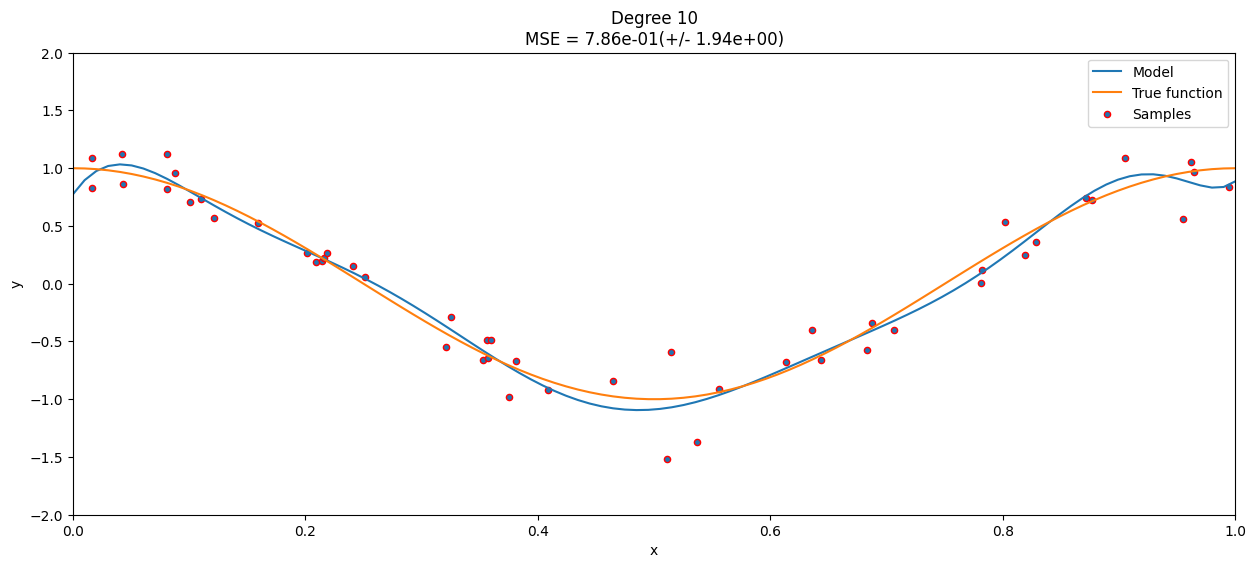

In [240]:
plt.figure(figsize=(15, 6))

scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                          scoring="neg_mean_squared_error", cv=10)

X_test = np.linspace(0, 1, 100)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, y, edgecolor='r', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
    degrees, -scores.mean(), scores.std()))
plt.show()

Optimal degree in terms of MSE is:

*7.86 e-01*

Explain what heppens when the value is higher:

*I tried the degree from 1 - 20 for each model and evaluate them. The figure is shown below. I plot the line chart for the relationships between the different degrees' model and MSE score. When the value gets bigger and bigger, I find that the MSE increases more and more significantly. Besides, according to the changes of the above figure in different degree, when the degree become higher,the model become more and more overfitting. (You can change the degree to 20 to re-run the two previous code blocks and observe the changes of figure compared with it in degree of 10)*

Explain what heppens when the value is lower:

*I tried the degree from 1 - 20 for each model and evalueate them. The figure is shown below. I plot the line chart for the relationships between the different degrees' model and MSE score. When the value is lower, I find that there is no significant changes for MSE score. However, the model will become more and more underfitting according to the changes in the above figure. (You can change the degree to 1 to re-run the two previous code blocks and observe the changes of figure compared with it in degree of 10)*

(10 points)


[0.8305954050139389, 0.11851458519109825, 0.29272186468432915, 0.037457715085863215, 0.03526542575950938, 0.07419619836282257, 0.6033931198803637, 1.0237951267207899, 1.0787537015790272, 0.7859477666424505, 23.62751682435972, 1731.3977790342174, 217.08211226014214, 2928.887541125662, 90537.6875987492, 49538.2595917656, 553293.286241847, 6462620.825542553, 38212884.22396408, 47978734.13649492]


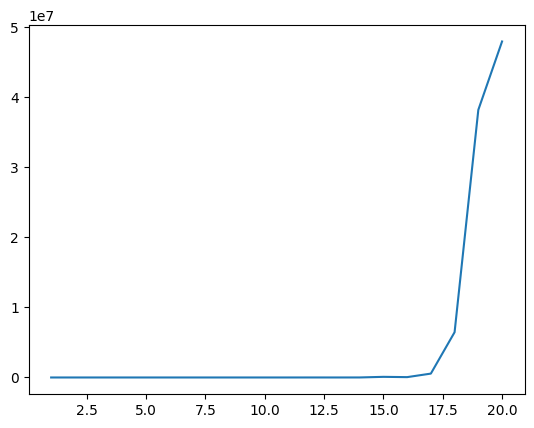

In [241]:
MSEs = []
max_degree = 20
for degrees in range(1, max_degree+1):
    polynomial_features = PolynomialFeatures(degree=degrees,
                                          include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                          scoring="neg_mean_squared_error", cv=10)
    MSEs.append(-scores.mean())

print(MSEs)
plt.plot(range(1, max_degree+1), MSEs)
plt.show()


# Bouns: Implement kNN (10 points)

In [242]:
import numpy as np

# Write your own implementation of KNN. Your code should pass tests in the cell below.
class KNN:
    def __init__(self, k=3):
        """
        Method is called when an object is created
        """
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        """
        Method is called to train (fit) the model
        """
        # Your code here
        self.X_train = X_train
        self.y_train = y_train
        print("============LabelInfo============")
        print(f"X_shape: {X_train.shape}")
        print(f"Y_shape: {y_train.shape}")
        print("=================================")
        return

    def predict(self, X_test) -> np.ndarray:
        """
        Method is called to predict labels for new data
        """
        # Your code here
        self.X_test = X_test
        self.distances = self.calculate_distance()
        print(f"Unsorted Distances: {self.distances}")
        self.predictions = np.argsort(self.distances, axis=1)
        print(f"Sorted Predictions: {self.predictions}")
        self.predictions = self.predictions[:,:self.k]
        print(f"Cutted Prediction: {self.predictions}")
        self.predictions = self.y_train[self.predictions]
        print(f"Labeled Predictions: {self.predictions}")
        self.predictions = np.array([np.bincount(prediction) for prediction in self.predictions])
        print(f"Counted Predictions: {self.predictions}")
        self.predictions = np.argmax(self.predictions, axis=1)
        print(f"Final Predictions: {self.predictions}")
        return self.predictions # predictions should be in format of Numpy array
    
    def calculate_distance(self):
        
        # X_train_2 = self.X_train**2
        # X_test_2 = self.X_test**2
        # result = np.matmul(X_test_2, X_train_2.T)
        # print(X_train_2)
        # print(X_test_2)
        
        result = []
        
        for sample in self.X_test:
            # print(self.X_train - sample)
            result.append(self.X_train - sample)

        # print(result)
        result = np.array(result)**2
        # print(result)
        result = result.sum(axis=2)
        # print(result)
        return result


In [243]:
def basicTest(k=3):
    model = KNN(k=k)
    # Basic Test
    X_train = np.array([[1, 2], [2, 3], [3, 4], [5, 6], [6, 7]])
    y_train = np.array([0, 0, 0, 1, 1])
    X_test = np.array([[4, 5], [7, 8]])
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    assert np.array_equal(predictions, np.array([0, 1])), f"Expected [0, 1] but got {predictions}"

basicTest()

============LabelInfo============
X_shape: (5, 2)
Y_shape: (5,)
Unsorted Distances: [[18  8  2  2  8]
 [72 50 32  8  2]]
Sorted Predictions: [[2 3 1 4 0]
 [4 3 2 1 0]]
Cutted Prediction: [[2 3 1]
 [4 3 2]]
Labeled Predictions: [[0 1 0]
 [1 1 0]]
Counted Predictions: [[2 1]
 [1 2]]
Final Predictions: [0 1]


Run the following cell to test your code.

Note: This action is required for grading purposes (10 points)

In [244]:
def test_knn():
    model = KNN(k=3)

    # Basic Test
    X_train = np.array([[1, 2], [2, 3], [3, 4], [5, 6], [6, 7]])
    y_train = np.array([0, 0, 0, 1, 1])
    X_test = np.array([[4, 5], [7, 8]])
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    assert np.array_equal(predictions, np.array([0, 1])), f"Expected [0, 1] but got {predictions}"

    # Edge Case Test: All points are equidistant from test point
    X_train = np.array([[1, 1], [1, 1], [1, 1]])
    y_train = np.array([0, 1, 2])
    X_test = np.array([[1, 1]])
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    assert predictions[0] in y_train, f"Prediction should be one of the training labels, got {predictions[0]}"

    # Different k-values Test
    X_train = np.array([[1, 2], [2, 3], [3, 4], [5, 6], [6, 7]])
    y_train = np.array([0, 0, 0, 1, 1])
    X_test = np.array([[4, 5]])

    model = KNN(k=1)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    assert predictions[0] == 0, f"Expected 0 but got {predictions[0]}"

    model = KNN(k=5)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    assert predictions[0] == 0, f"Expected 0 but got {predictions[0]}"

    # Tie Case Test
    X_train = np.array([[1, 2], [2, 3], [5, 6], [6, 7]])
    y_train = np.array([0, 0, 1, 1])
    X_test = np.array([[4, 5]])
    model = KNN(k=3)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    assert predictions[0] == 0 or predictions[0] == 1, f"Expected 0 or 1 but got {predictions[0]}"

    print("All tests passed! Your code works as expected")

test_knn()


============LabelInfo============
X_shape: (5, 2)
Y_shape: (5,)
Unsorted Distances: [[18  8  2  2  8]
 [72 50 32  8  2]]
Sorted Predictions: [[2 3 1 4 0]
 [4 3 2 1 0]]
Cutted Prediction: [[2 3 1]
 [4 3 2]]
Labeled Predictions: [[0 1 0]
 [1 1 0]]
Counted Predictions: [[2 1]
 [1 2]]
Final Predictions: [0 1]
============LabelInfo============
X_shape: (3, 2)
Y_shape: (3,)
Unsorted Distances: [[0 0 0]]
Sorted Predictions: [[0 1 2]]
Cutted Prediction: [[0 1 2]]
Labeled Predictions: [[0 1 2]]
Counted Predictions: [[1 1 1]]
Final Predictions: [0]
============LabelInfo============
X_shape: (5, 2)
Y_shape: (5,)
Unsorted Distances: [[18  8  2  2  8]]
Sorted Predictions: [[2 3 1 4 0]]
Cutted Prediction: [[2]]
Labeled Predictions: [[0]]
Counted Predictions: [[1]]
Final Predictions: [0]
============LabelInfo============
X_shape: (5, 2)
Y_shape: (5,)
Unsorted Distances: [[18  8  2  2  8]]
Sorted Predictions: [[2 3 1 4 0]]
Cutted Prediction: [[2 3 1 4 0]]
Labeled Predictions: [[0 1 0 1 0]]
Counted Pre